# A1: Three-Layer Neural Network

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1">Requirements</a></span></li><li><span><a href="#Example-Results" data-toc-modified-id="Example-Results-2">Example Results</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3">Discussion</a></span></li></ul></div>

## Requirements

In this assignment, you will start with code from lecture notes 04 and add code to do the following.

* Add another hidden layer, for a total of two hidden layers.  This layer will use a weight matrix named `U`.  Its outputs will be named `Zu` and the outputs of the second hidden layer will be changed to `Zv`.
* Define function `forward` that returns the output of all of the layers in the neural network for all samples in `X`. `X` is assumed to be standardized and have the initial column of constant 1 values.

      def forward(X, U, V, W):
          .
          .
          .
          Y = . . . # output of neural network for all rows in X
          return Zu, Zv, Y
      
* Define function `gradient` that returns the gradients of the mean squared error with respect to each of the three weight matrices. `X` and `T` are assumed to be standardized and `X` has the initial column of 1's.

      def gradient(X, T, Zu, Zv, Y, U, V, W):
          .
          .
          .
          return grad_wrt_U, grad_wrt_V, grad_wrt_W
          
* Define function `train` that returns the resulting values of `U`, `V`, and `W` and the standardization parameters.  Arguments are unstandardized `X` and `T`, the number of units in the two hidden layers, the number of epochs and the learning rate, which is the same value for all layers. This function standardizes `X` and `T`, initializes `U`, `V` and `W` to uniformly distributed random values between -1 and 1, and `U`, `V` and `W` for `n_epochs` times as shown in lecture notes 04.  This function must call `forward`, `gradient` and `addOnes`.

      def train(X, T, n_units_U, n_units_V, n_epochs, rho):
          .
          .
          .
          return U, V, W, X_means, X_stds, T_means, T_stds
          
* Define function `use` that accepts unstandardized `X`, standardization parameters, and weight matrices `U`, `V`, and `W` and returns the unstandardized output.

      def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
          .
          .
          .
          Y = ....
          return Y

## Example Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def addOnes(X):
    return np.insert(X, 0, 1, axis=1)

def rmse(T, Y, Tstds):
    error = (T - Y) * Tstds 
    return np.sqrt(np.mean(error ** 2))

Add code cells here to define the functions above.  Once these are correctly defined, the following cells should run and produce similar results as those here.

In [2]:
def forward(X, U, V, W):
    #TODO X -> U -> Zu -> V -> Zv -> W -> Y
    Zu = np.tanh(X @ U)
    Zu1 = addOnes(Zu)
    Zv = np.tanh(Zu1 @ V)
    Zv1 = addOnes(Zv)
    Y = Zv1 @ W
    return Zu, Zv, Y

In [3]:
def gradient(X, T, Zu, Zv, Y, U, V, W):
    #TODO
    Dw = T - Y
    Dv = Dw @ W[1:, :].T * (1 - Zv**2)
    Du = Dv @ V[1:, :].T * (1 - Zu**2)
    Zv1 = addOnes(Zv)
    grad_wrt_W = - Zv1.T @ Dw
    Zu1 = addOnes(Zu)
    grad_wrt_V = - Zu1.T @ Dv
    grad_wrt_U = - X.T @ Du
    
    return grad_wrt_U, grad_wrt_V, grad_wrt_W

In [4]:
def train(X, T, n_units_U, n_units_V, n_epochs, rho):
    #TODO
    X_means = X.mean(axis=0)
    X_stds = X.std(axis=0)
    T_means = T.mean(axis=0)
    T_stds = T.std(axis=0)

    XS = (X - X_means) / X_stds
    TS = (T - T_means) / T_stds
    
    XS1 = addOnes(XS)
    TS1 = addOnes(TS)
    n_samples, n_outputs = T.shape
#     rho = rho / (n_samples * n_outputs)
    U = np.random.uniform(-1, 1, size=(1 + XS.shape[1], n_units_U)) / np.sqrt(XS1.shape[1])
    V = np.random.uniform(-1, 1, size=(1 + n_units_U, n_units_V)) / np.sqrt(n_units_U + 1)
    W = np.random.uniform(-1, 1, size=(1 + n_units_V, n_outputs)) / np.sqrt(n_units_V + 1)
    
    for epoch in range(n_epochs):
        Zu, Zv, Y = forward(XS1, U, V, W)
        grad_wrt_U, grad_wrt_V, grad_wrt_W = gradient(XS1, TS, Zu, Zv, Y, U, V, W)
        
        # Take step down the gradient
        W = W - rho * grad_wrt_W
        V = V - rho * grad_wrt_V
        U = U - rho * grad_wrt_U  
#         if epoch % 2000 == 0 or epoch == n_epochs - 1:
#             print('W: ', grad_wrt_W[0])
    return U, V, W, X_means, X_stds, T_means, T_stds

In [5]:
def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
    #TODO: outputs = train()->(addOnes(), forward(), gradient())
    #TODO use(outputs)
    # Needs the t_means to unstandarize the outputs as the matrix is trained on standarized data
    # and will produce standarized results which must be unstandardized to be meaningful
    XtrainS = (X - X_means) / X_stds
    XtrainS1 = addOnes(XtrainS)
    Zu, Zv, Y = forward(XtrainS1, U, V, W)
    Y = Y * T_stds + T_means
    return Y

In [6]:
Xtrain = np.arange(4).reshape(-1, 1)
Ttrain = Xtrain ** 2

Xtest = Xtrain + 0.5
Ttest = Xtest ** 2

In [7]:
U = np.array([[1, 2, 3], [4, 5, 6]])  # 2 x 3 matrix, for 2 inputs (include constant 1) and 3 units
V = np.array([[-1, 3], [1, 3], [-2, 1], [2, -4]]) # 2 x 3 matrix, for 3 inputs (include constant 1) and 2 units
W = np.array([[-1], [2], [3]])  # 3 x 1 matrix, for 3 inputs (include constant 1) and 1 ounit

In [8]:
X_means = np.mean(Xtrain, axis=0)
X_stds = np.std(Xtrain, axis=0)
Xtrain_st = (Xtrain - X_means) / X_stds

In [9]:
Zu, Zv, Y = forward(addOnes(Xtrain_st), U, V, W)
print('Zu = ', Zu)
print('Zv = ', Zv)
print('Y = ', Y)

Zu =  [[-0.99967774 -0.99983726 -0.99991782]
 [-0.65775956 -0.23177837  0.3065367 ]
 [ 0.99246605  0.99958165  0.99997685]
 [ 0.9999941   0.99999995  1.        ]]
Zv =  [[-9.64016194e-01  9.95062648e-01]
 [-5.23485834e-01 -4.06326878e-01]
 [-6.74345774e-03  9.94823310e-01]
 [-5.79521329e-06  9.95054578e-01]]
Y =  [[ 0.05715556]
 [-3.2659523 ]
 [ 1.97098301]
 [ 1.98515214]]


In [10]:
T_means = np.mean(Ttrain, axis=0)
T_stds = np.std(Ttrain, axis=0)
Ttrain_st = (Ttrain - T_means) / T_stds
grad_wrt_U, grad_wrt_V, grad_wrt_W = gradient(Xtrain_st, Ttrain_st, Zu, Zv, Y, U, V, W)
print('grad_wrt_U = ', grad_wrt_U)
print('grad_wrt_V = ', grad_wrt_V)
print('grad_wrt_W = ', grad_wrt_W)

grad_wrt_U =  [[ 5.83033911 -0.43361979 -7.35611199]]
grad_wrt_V =  [[ 0.92812794 -6.29102685]
 [ 6.74349351  4.24106248]
 [ 5.19130234  1.51895191]
 [ 3.19836999 -1.92147926]]
grad_wrt_W =  [[0.74733841]
 [0.30431595]
 [4.31908649]]


In [11]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
Y

array([[ 3.70004445],
       [-7.93083306],
       [10.39844055],
       [10.44803251]])

Here is another example that just shows the final results of training.

In [12]:
n = 30
Xtrain = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain + 10) + 0.4 * np.sin(Xtrain + 10) + 0.2 * np.random.normal(size=(n, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (Xtest + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))

In [13]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 100, 0.01)

In [14]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

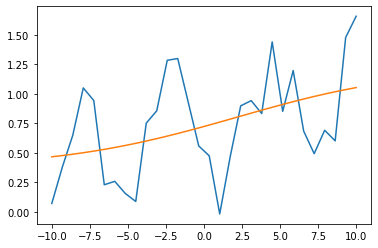

In [15]:
plt.plot(Xtrain, Ttrain)
plt.plot(Xtrain, Y);

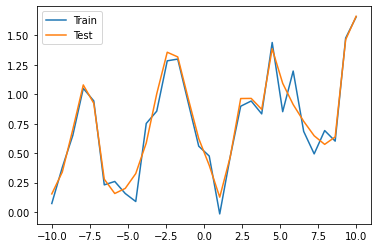

In [16]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 10000, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();

In [17]:
n = 40
Xtrain = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain + 10) + 0.4 * np.sin(Xtrain + 10) + 0.2 * np.random.normal(size=(n, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (Xtest + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))
print('Xtrain.shape =', Xtrain.shape, 'Xtest.shape =', Xtest.shape, 'Ttrain.shape =', Ttrain.shape, 'Ttest.shape =', Ttest.shape)
print('Xtrain: ', Xtrain[:10])
print('Ttrain: ',Ttrain[:10])

Xtrain.shape = (40, 1) Xtest.shape = (40, 1) Ttrain.shape = (40, 1) Ttest.shape = (40, 1)
Xtrain:  [[-10.        ]
 [ -9.48717949]
 [ -8.97435897]
 [ -8.46153846]
 [ -7.94871795]
 [ -7.43589744]
 [ -6.92307692]
 [ -6.41025641]
 [ -5.8974359 ]
 [ -5.38461538]]
Ttrain:  [[ 0.32279807]
 [ 0.26377444]
 [ 0.47389208]
 [ 0.34879161]
 [ 0.80924002]
 [ 0.24833143]
 [-0.01295424]
 [ 0.26114528]
 [-0.0219219 ]
 [-0.09431187]]


In [18]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 100, 0.01)

In [19]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

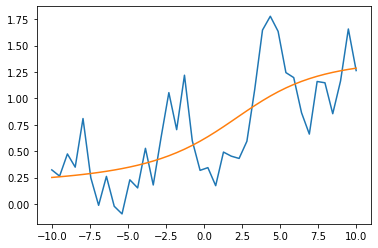

In [20]:
plt.plot(Xtrain, Ttrain)
plt.plot(Xtrain, Y);

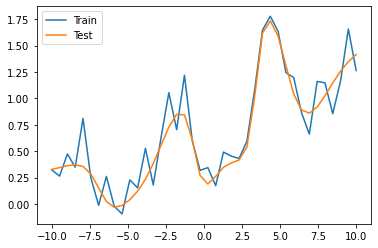

In [21]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 10000, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.legend();

## Discussion

My initial difficulties were  in simply understanding precisely what was required for each function and how each function fit together with the others. I found it helpful to read the descriptions thouroughly, examine the parameters and outputs of each function, and to then rewrite what each function was supposed to do along with some implementation details in a comment in each function definition code cell. The use function in particular took some thinking. The presence of the t_means and t_stds threw me off for awhile until I went back and reviewed the class lecture and recalled Chuck's statement that the producded Y values from the network are standardized from T and need to be unstandardized to be meaningful. The coding itself was rather straight forward once I understood what precisely was supposed to be done. The only notable exception to that was determining the value of rho. Despite having the gradient, use, and forward functions all correct the train function did not seem to be actually training. The predicitions its matrices produced were poor. I did some debugging and noticed that the values for U, V, and W were being adjusted throughout the runs but this didn't seemed to make them more accurate. I stared at my code for awhile and noticed that I had adjusted my rho value like so (rho_h = rho_h / (n_samples * n_outputs)). I did this because Chuck has done so in his code. I was unsure why this was being done and removed it. After some discussion I relized this had been done to try and find a good rho value based on the data. The rho value supplied was already pretty good, hence why doing it gave poor results,  After this the model trained properly. I tried some different n's to ensure I had not improperly hardcoded any dimensions and it all seems to be working. 

# Grading

<font color='red'>*A1grader.tar will be available Friday.*</font>

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  The remaining 10 points will be based on your discussion of this assignment.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [22]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'A1 Three-Layer Neural Network.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
    X = np.arange(4).reshape(-1, 1)
    T = np.log(X + 10)

    ni = 1
    nu = 2
    nv = 3
    U = np.arange((ni + 1) * nu).reshape(ni + 1, nu) * 0.1
    V = (np.arange((nu + 1) * nv).reshape(nu + 1, nv) - 6) * 0.1
    W = np.arange(nv + 1).reshape(nv + 1, 1) * -0.1

    Zu, Zv, Y = forward(addOnes(X), U, V, W)


--- 20/20 points. Zu, Zv and Y are correct.

Testing
    X = np.arange(4).reshape(-1, 1)
    T = np.log(X + 10)

    ni = 1
    nu = 2
    nv = 3
    U = np.arange((ni + 1) * nu).reshape(ni + 1, nu) * 0.1
    V = (np.arange((nu + 1) * nv).reshape(nu + 1, nv) - 6) * 0.1
    W = np.arange(nv + 1).reshape(nv + 1, 1) * -0.1

    Zu = np.array([[0.        , 0.09966799],
                   [0.19737532, 0.37994896],
  

<Figure size 432x288 with 0 Axes>

# Extra Credit

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.

I chose the Wine Quality dataset:
http://archive.ics.uci.edu/ml/datasets/Wine+Quality

I did so because it was setup for regression and because I recently visited the Finger Lakes in upstate New York, which is known for producing good wine. I had the option of either the red wine or white wine dataset within these. I chose white because the Finger Lakes are known for their Reislings.

I started by importing the data and getting it cleaned up. I had to play around with it to get it into a shape amenable to training and testing. I decided to take a look at residual sugar predicting quality first. I seperated this into training and test data, and ran it through the model twice. It did an ok job at predicting quality, but there didn't seem to be a huge correlation between the two to begin with. 
I then tried using alcohol level and after that total sulphur dioxide to predict quality. Again, both did an OK job predicting. The higher alcohol levels did seem to be a slightly better predictor of quality (I wonder why?) then any of the other predictors I tried, so fitting to this seemed to be yield a better result.

In [23]:
import pandas

In [24]:
data = pandas.read_csv('winequality-white.csv', delimiter=';', usecols=range(12))
data = data.dropna(axis=0)
data.shape

(4898, 12)

In [25]:
data['residual sugar'][:10]

0    20.7
1     1.6
2     6.9
3     8.5
4     8.5
5     6.9
6     7.0
7    20.7
8     1.6
9     1.5
Name: residual sugar, dtype: float64

In [26]:
data['quality'][:10]

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: quality, dtype: int64

In [27]:
X_Wine = data['residual sugar']
T_Wine = data['quality']
print(X_Wine.shape)
X = np.array(X_Wine[:100]).reshape((-1, 1))
T = np.array(T_Wine[:100]).reshape((-1, 1))

(4898,)


In [28]:
training_fraction = 0.8
n_rows = X[:100].shape[0]
row_indices = np.arange(n_rows)
np.random.shuffle(row_indices)
n_train = round(n_rows * training_fraction)
n_test = n_rows - n_train

Xtrain = X[row_indices[:n_train], :]
Ttrain = T[row_indices[:n_train], :]
Xtest = X[row_indices[n_train:], :]
Ttest = T[row_indices[n_train:], :]

print('Xtrain.shape =', Xtrain.shape, 'Xtest.shape =', Xtest.shape, 'Ttrain.shape =', Ttrain.shape, 'Ttest.shape =', Ttest.shape)
print('Xtrain: ', Xtrain[:10])
print('Ttrain: ',Ttrain[:10])

Xtrain.shape = (80, 1) Xtest.shape = (20, 1) Ttrain.shape = (80, 1) Ttest.shape = (20, 1)
Xtrain:  [[ 1.  ]
 [ 1.3 ]
 [12.4 ]
 [19.25]
 [ 6.9 ]
 [ 1.4 ]
 [17.95]
 [13.3 ]
 [ 4.4 ]
 [ 1.5 ]]
Ttrain:  [[6]
 [7]
 [6]
 [5]
 [6]
 [7]
 [5]
 [6]
 [4]
 [6]]


In [29]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 100, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

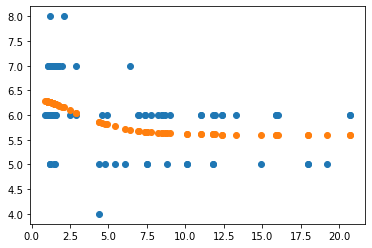

In [30]:
plt.plot(Xtrain, Ttrain, 'o')
plt.plot(Xtrain, Y, 'o');

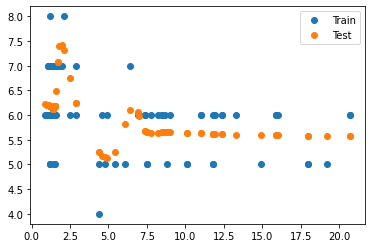

In [31]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 10000, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, 'o', label='Train')
plt.plot(Xtrain, Y, 'o', label='Test')
plt.legend();

In [32]:
X_Wine = data['alcohol']
T_Wine = data['quality']
print(X_Wine.shape)
X = np.array(X_Wine[:100]).reshape((-1, 1))
T = np.array(T_Wine[:100]).reshape((-1, 1))

(4898,)


In [33]:
training_fraction = 0.8
n_rows = X[:100].shape[0]
row_indices = np.arange(n_rows)
np.random.shuffle(row_indices)
n_train = round(n_rows * training_fraction)
n_test = n_rows - n_train

Xtrain = X[row_indices[:n_train], :]
Ttrain = T[row_indices[:n_train], :]
Xtest = X[row_indices[n_train:], :]
Ttest = T[row_indices[n_train:], :]

In [34]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 100, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

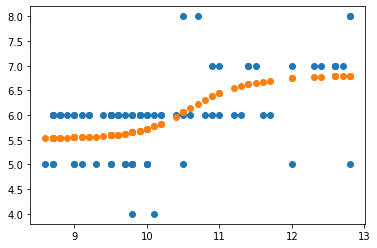

In [35]:
plt.plot(Xtrain, Ttrain, 'o')
plt.plot(Xtrain, Y, 'o');

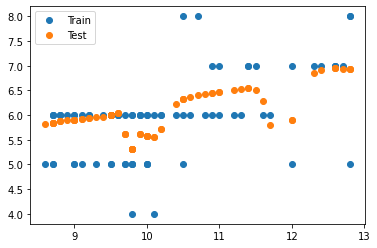

In [36]:
U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 10000, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, 'o', label='Train')
plt.plot(Xtrain, Y, 'o', label='Test')
plt.legend();

(4898,)


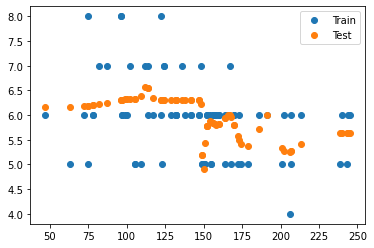

In [37]:
X_Wine = data['total sulfur dioxide']
T_Wine = data['quality']
print(X_Wine.shape)
X = np.array(X_Wine[:100]).reshape((-1, 1))
T = np.array(T_Wine[:100]).reshape((-1, 1))
training_fraction = 0.8
n_rows = X[:100].shape[0]
row_indices = np.arange(n_rows)
np.random.shuffle(row_indices)
n_train = round(n_rows * training_fraction)
n_test = n_rows - n_train

Xtrain = X[row_indices[:n_train], :]
Ttrain = T[row_indices[:n_train], :]
Xtest = X[row_indices[n_train:], :]
Ttest = T[row_indices[n_train:], :]

U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 10000, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, 'o', label='Train')
plt.plot(Xtrain, Y, 'o', label='Test')
plt.legend();

(4898,)


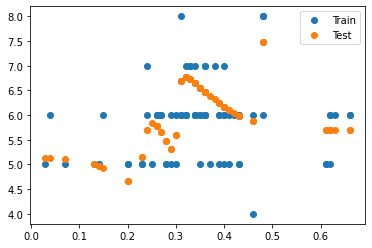

In [38]:
X_Wine = data['citric acid']
T_Wine = data['quality']
print(X_Wine.shape)
X = np.array(X_Wine[:100]).reshape((-1, 1))
T = np.array(T_Wine[:100]).reshape((-1, 1))
training_fraction = 0.8
n_rows = X[:100].shape[0]
row_indices = np.arange(n_rows)
np.random.shuffle(row_indices)
n_train = round(n_rows * training_fraction)
n_test = n_rows - n_train

Xtrain = X[row_indices[:n_train], :]
Ttrain = T[row_indices[:n_train], :]
Xtest = X[row_indices[n_train:], :]
Ttest = T[row_indices[n_train:], :]

U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 10000, 0.01)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
plt.plot(Xtrain, Ttrain, 'o', label='Train')
plt.plot(Xtrain, Y, 'o', label='Test')
plt.legend();